In [1]:
#1
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#2
df = df.dropna(how='any',axis=0)
df.shape

(183, 12)

In [3]:
#3
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Cabin']
for column in columns_to_drop:
    df = df.drop(column, axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
1,1,1,female,38.0,71.2833,C
3,1,1,female,35.0,53.1000,S
6,0,1,male,54.0,51.8625,S
10,1,3,female,4.0,16.7000,S
11,1,1,female,58.0,26.5500,S


In [4]:
#4
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


columns_to_encode = ["Embarked","Sex"]
for column in columns_to_encode:
    dummies = pd.get_dummies(data=df[column],prefix=column)
    df = pd.concat([df.drop(column,axis=1),dummies],axis=1)
df.head()

,Survived,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
1,1,1,38.0,71.2833,1,0,0,1,0
3,1,1,35.0,53.1000,0,0,1,1,0
6,0,1,54.0,51.8625,0,0,1,0,1
10,1,3,4.0,16.7000,0,0,1,1,0
11,1,1,58.0,26.5500,0,0,1,1,0


In [5]:
#5
x = df.drop("Survived",axis=1)
y = df["Survived"]
print(x.shape)
print(y.shape)

(183, 8)
(183,)


In [6]:
#6
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(128, 8)
(128,)
(55, 8)
(55,)


In [7]:
#7
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
pr_train,pr_test = tree.predict(x_train),tree.predict(x_test)
acc_test = accuracy_score(y_test, pr_test)
acc_train = accuracy_score(y_train, pr_train)
print("accuracy of train set prediction :",acc_train)
print("accuracy of test set prediction :",acc_test)

accuracy of train set prediction : 1.0
accuracy of test set prediction : 0.7090909090909091


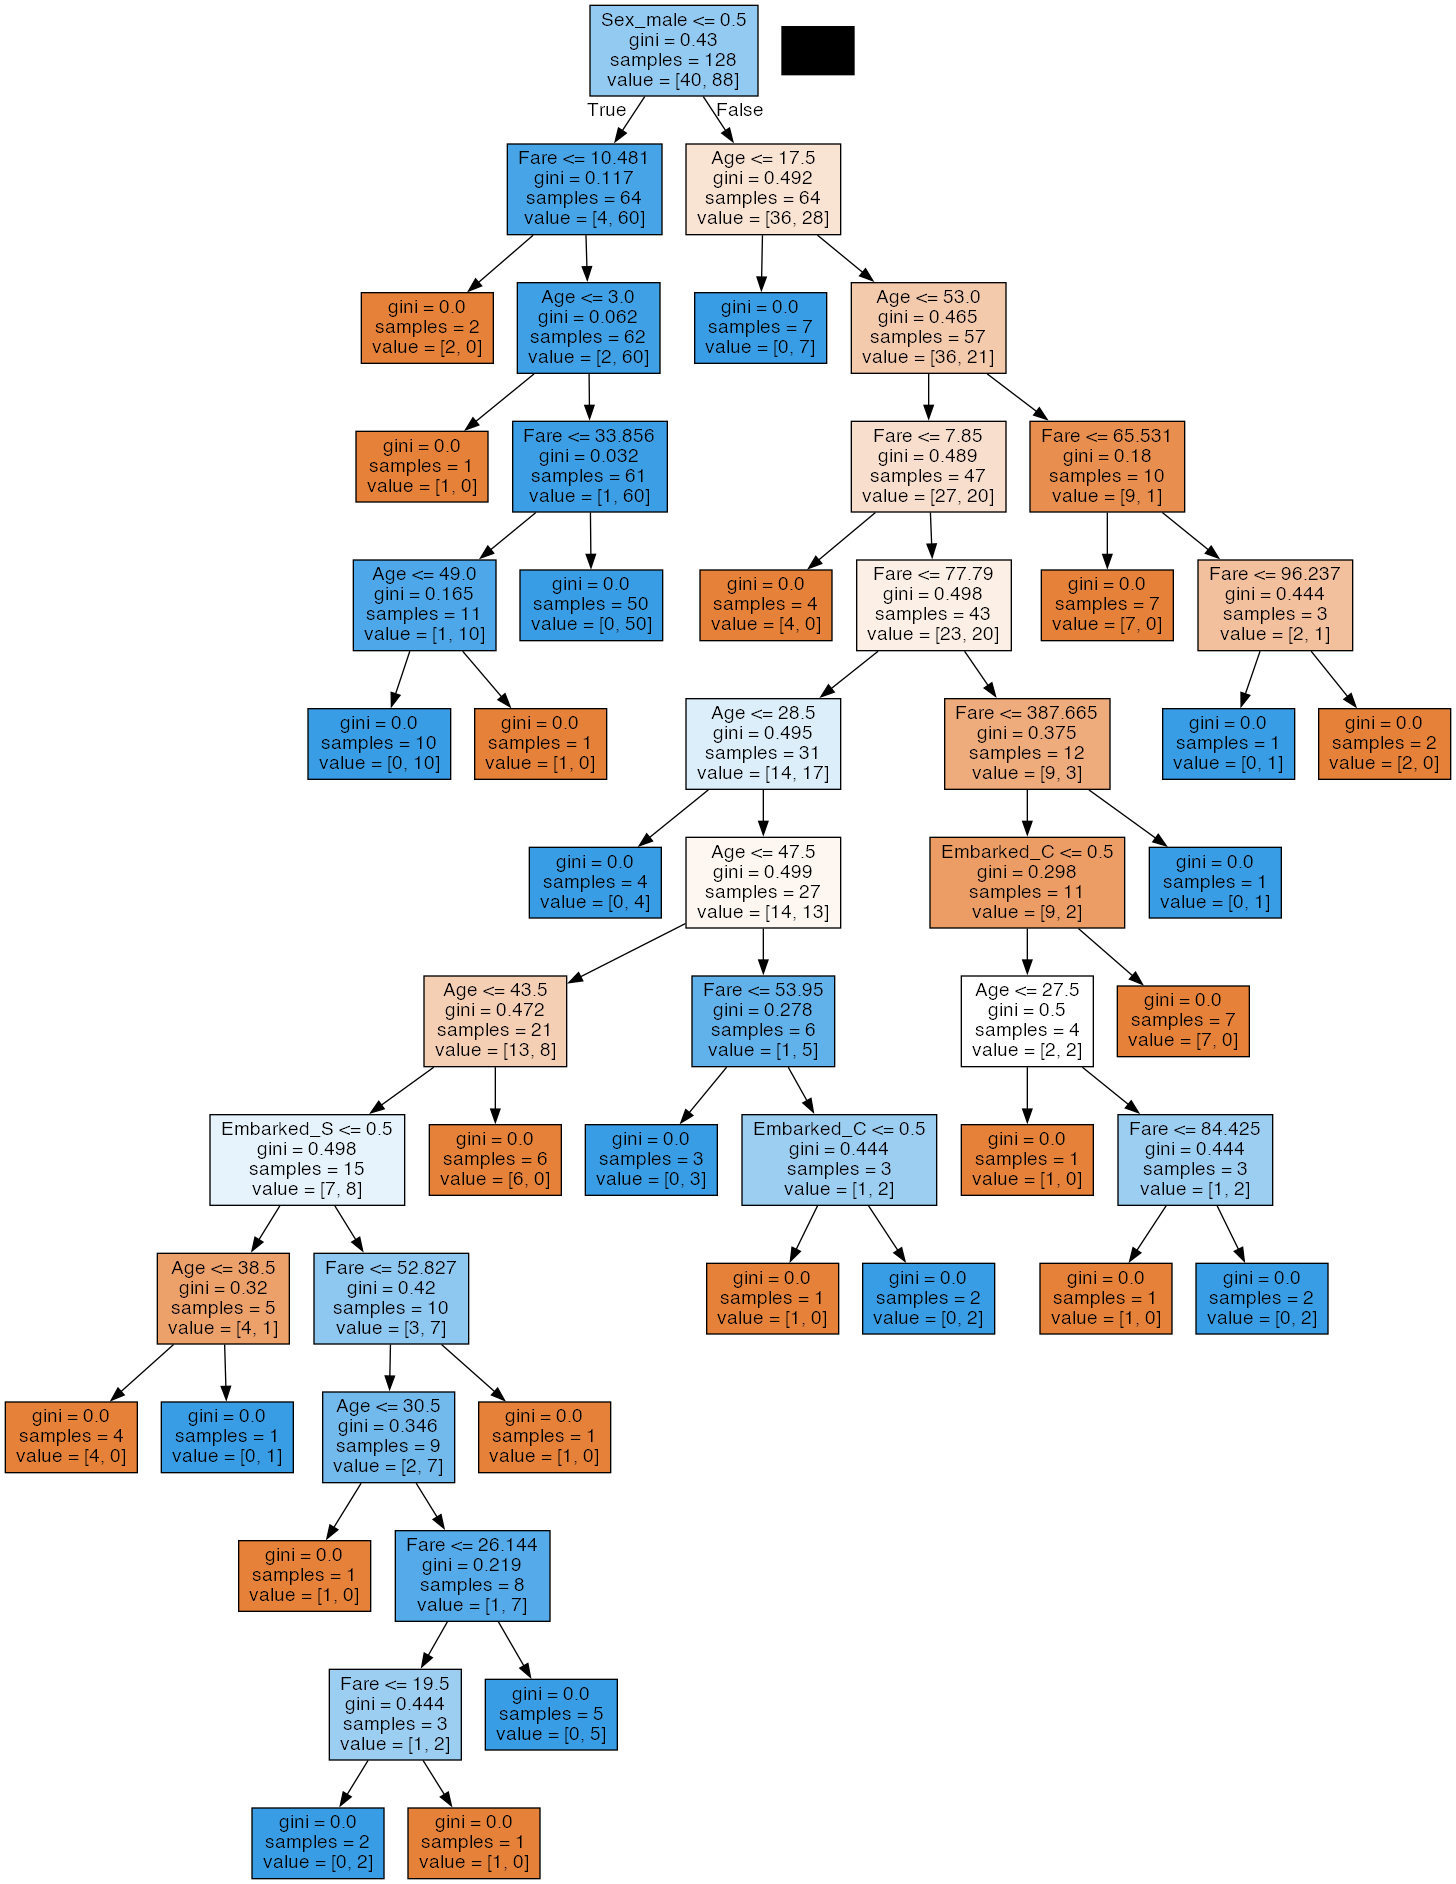

In [8]:
#8
import graphviz
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import datasets
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None,feature_names=x_train.columns,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


#### 9
yes, based on the accuracy of train set prediction and depth of the tree we could say the tree is overfitted
we could do some pre or post pruning to cancel out the overfitting problem

Text(0.5, 1.0, 'Confusion Matrix')

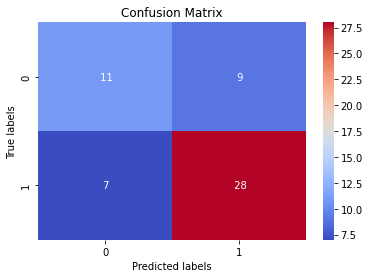

In [9]:
#10
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, pr_test)
ax = plt.subplot()
sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


In [10]:
#11-1
import time
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15]}
tree_cv = GridSearchCV(tree,params,cv=5,n_jobs = -1)

tree_cv.fit(x_train, y_train)


print("Best Parameters :",tree_cv.best_params_)
print("GridSearch Score :",(tree_cv.best_score_*100).round(2),'%')

best_tree = tree_cv.best_estimator_
pr_test = best_tree.predict(x_test)
acc_test = accuracy_score(y_test, pr_test)
print("accuracy of test set prediction :",acc_test)
best_tree_accuracy = acc_test

Best Parameters : {'max_depth': 2, 'min_samples_leaf': 1}
GridSearch Score : 78.92 %
accuracy of test set prediction : 0.7454545454545455


#### 11-1
the accuracy could increase, but the main result of gridsearch is that we assure the tree won't overfit

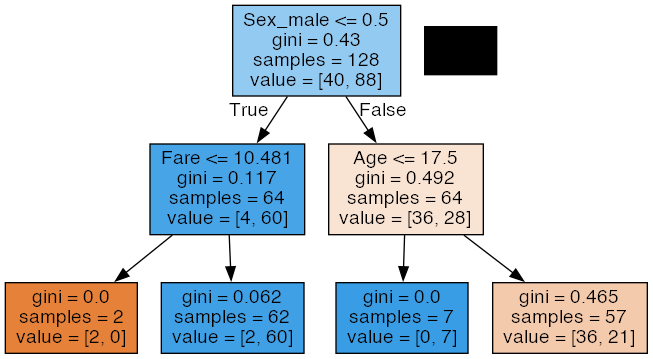

In [11]:
#12
dot_data = export_graphviz(best_tree, out_file=None,feature_names=x_train.columns,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [12]:
#13
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
#14
pr_test = rfc.predict(x_test)
pr_train = rfc.predict(x_train)
acc_test = accuracy_score(y_test, pr_test)
acc_train = accuracy_score(y_train, pr_train)
print("accuracy of random forest on train set :",acc_train)
print("accuracy of random forest on test set :",acc_test)

pr_test = best_tree.predict(x_test)
pr_train = best_tree.predict(x_train)
acc_test = accuracy_score(y_test, pr_test)
acc_train = accuracy_score(y_train, pr_train)
print("accuracy of best tree of grid search on train set :",acc_train)
print("accuracy of best tree of grid search on test set :",acc_test)

accuracy of random forest on train set : 1.0
accuracy of random forest on test set : 0.7636363636363637
accuracy of best tree of grid search on train set : 0.8203125
accuracy of best tree of grid search on test set : 0.7454545454545455


In [14]:
#15
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(2, 20, num = 2)]
max_depth.append(None)

min_samples_split = [int(x) for x in np.linspace(2, 10, num = 1)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 1)]
bootstrap = [True, False]
criterion = ["gini","entropy"]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

randomsearch = RandomizedSearchCV(rfc,random_grid,cv=3,n_jobs = -1)


randomsearch.fit(x_train, y_train)

print("Best Parameters :",randomsearch.best_params_)
print("random search Score :",(randomsearch.best_score_*100).round(2),'%')

Best Parameters : {'n_estimators': 366, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 2, 'criterion': 'gini', 'bootstrap': True}
random search Score : 75.78 %


In [15]:
#16
print("best criterion:",randomsearch.best_params_['criterion'])

best criterion: gini
